# Problem Statement
<br>
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
<br>
<br>

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
<br>
- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car
<br>
<br>
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

## Business Goal 

You are required to model the price of cars with the available independent variables. 
<br>
It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. 
<br>
Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Clearing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
# Reading data
cars = pd.read_csv("./data/CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Understanding

In [5]:
cars.shape

(205, 26)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- Cars dataset has 205 observations and 25 columns
- Target: price
- id: carId

In [7]:
df_cars = cars

### Going through each variables at hand
- Variable : car_ID

In [8]:
# Checking car_Id distribution
df_cars.car_ID.describe()

count    205.000000
mean     103.000000
std       59.322565
min        1.000000
25%       52.000000
50%      103.000000
75%      154.000000
max      205.000000
Name: car_ID, dtype: float64

In [9]:
df_cars['car_ID'].is_unique

True

- It looks like car_ID is an index column of the dataset

In [10]:
df_cars.set_index('car_ID',inplace=True)
df_cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


- Variable : Symboling
- Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe

In [11]:
df_cars.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

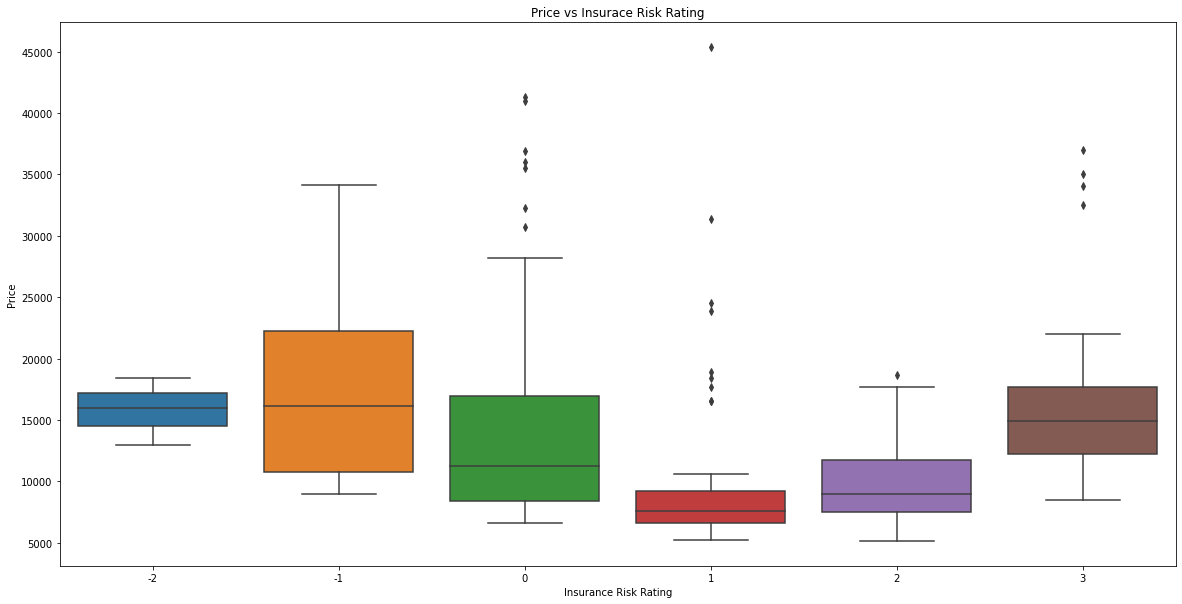

In [12]:
# How does it effect the price
plt.figure(figsize=(20,10))
sns.boxplot(x='symboling',y='price',data=df_cars)
plt.xlabel("Insurance Risk Rating")
plt.ylabel("Price")
plt.title("Price vs Insurace Risk Rating")
plt.show()

- Insurance rating 1 are the least priced in terms of the average values. Although we do have some outliers for this risk rating
- However, there is not much explained variance in price by Insurance Rating

##### Variable : CarName
- Name of car company and model 

In [13]:
# Let us extract Car Company name 
df_cars['car_company'] = df_cars["CarName"].map(lambda x:x.split()[0])
df_cars[["car_company","CarName"]].head()

,car_company,CarName
car_ID,,
1,alfa-romero,alfa-romero giulia
2,alfa-romero,alfa-romero stelvio
3,alfa-romero,alfa-romero Quadrifoglio
4,audi,audi 100 ls
5,audi,audi 100ls


In [14]:
# How many cars from each companies 
df_cars['car_company'].value_counts()


toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [15]:
# Correcting the names manually 
def carnamefix(name):
    if name=="toyouta":
        return "toyota"
    elif name=="vw" or name=="vokswagen":
        return "volkswagen"
    elif name=="porcshce":
        return "porsche"
    elif name=="maxda":
        return "mazda"
    else:
        return name.lower()

df_cars["car_company"] =  df_cars["car_company"].map(lambda x:carnamefix(x))
print("Number of cars from each companies:\n",df_cars["car_company"].value_counts())
print("Number of car companies: ",len(df_cars["car_company"].unique()))

Number of cars from each companies:
 toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64
Number of car companies:  22


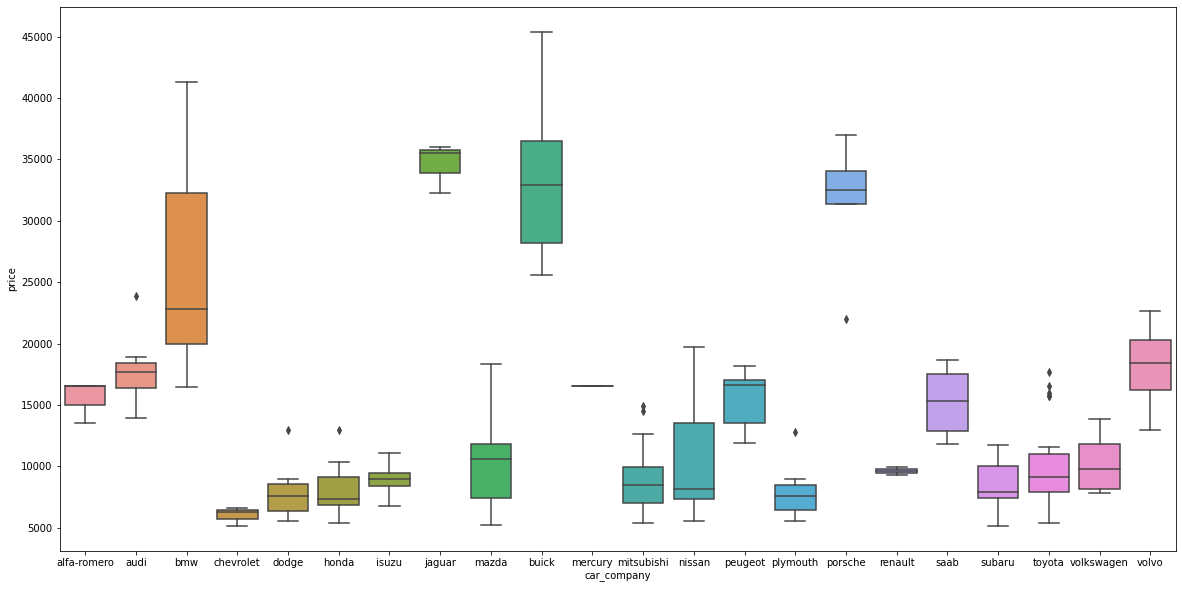

In [16]:
# Does brand name have any effect on price?
plt.figure(figsize=(20,10))
sns.boxplot(x="car_company",y="price",data=df_cars)
plt.show()

- Car_company does explain a lot of variation in car prices
- For example, price of jaguar, buick, bmw cars are significantly higher than others
- From business goal perspective, the management is more concerned with car design elements 

##### Next categorical variables : 
- fueltype
- aspiration
- door number
- carbody
- drive wheel
- engine location
- engine type
- cylinder number
- fuel type

In [17]:
# Let us check the value counts for each variables
cat_vars = ["fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"]

for i in cat_vars:
    print("Unique value counts for :",i)
    print(df_cars[i].value_counts())

Unique value counts for : fueltype
gas       185
diesel     20
Name: fueltype, dtype: int64
Unique value counts for : aspiration
std      168
turbo     37
Name: aspiration, dtype: int64
Unique value counts for : doornumber
four    115
two      90
Name: doornumber, dtype: int64
Unique value counts for : carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
Unique value counts for : drivewheel
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
Unique value counts for : enginelocation
front    202
rear       3
Name: enginelocation, dtype: int64
Unique value counts for : enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
Unique value counts for : cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
Unique value counts for : fuelsyst

- The class distributions are literally skewed - not too much observations in some categories

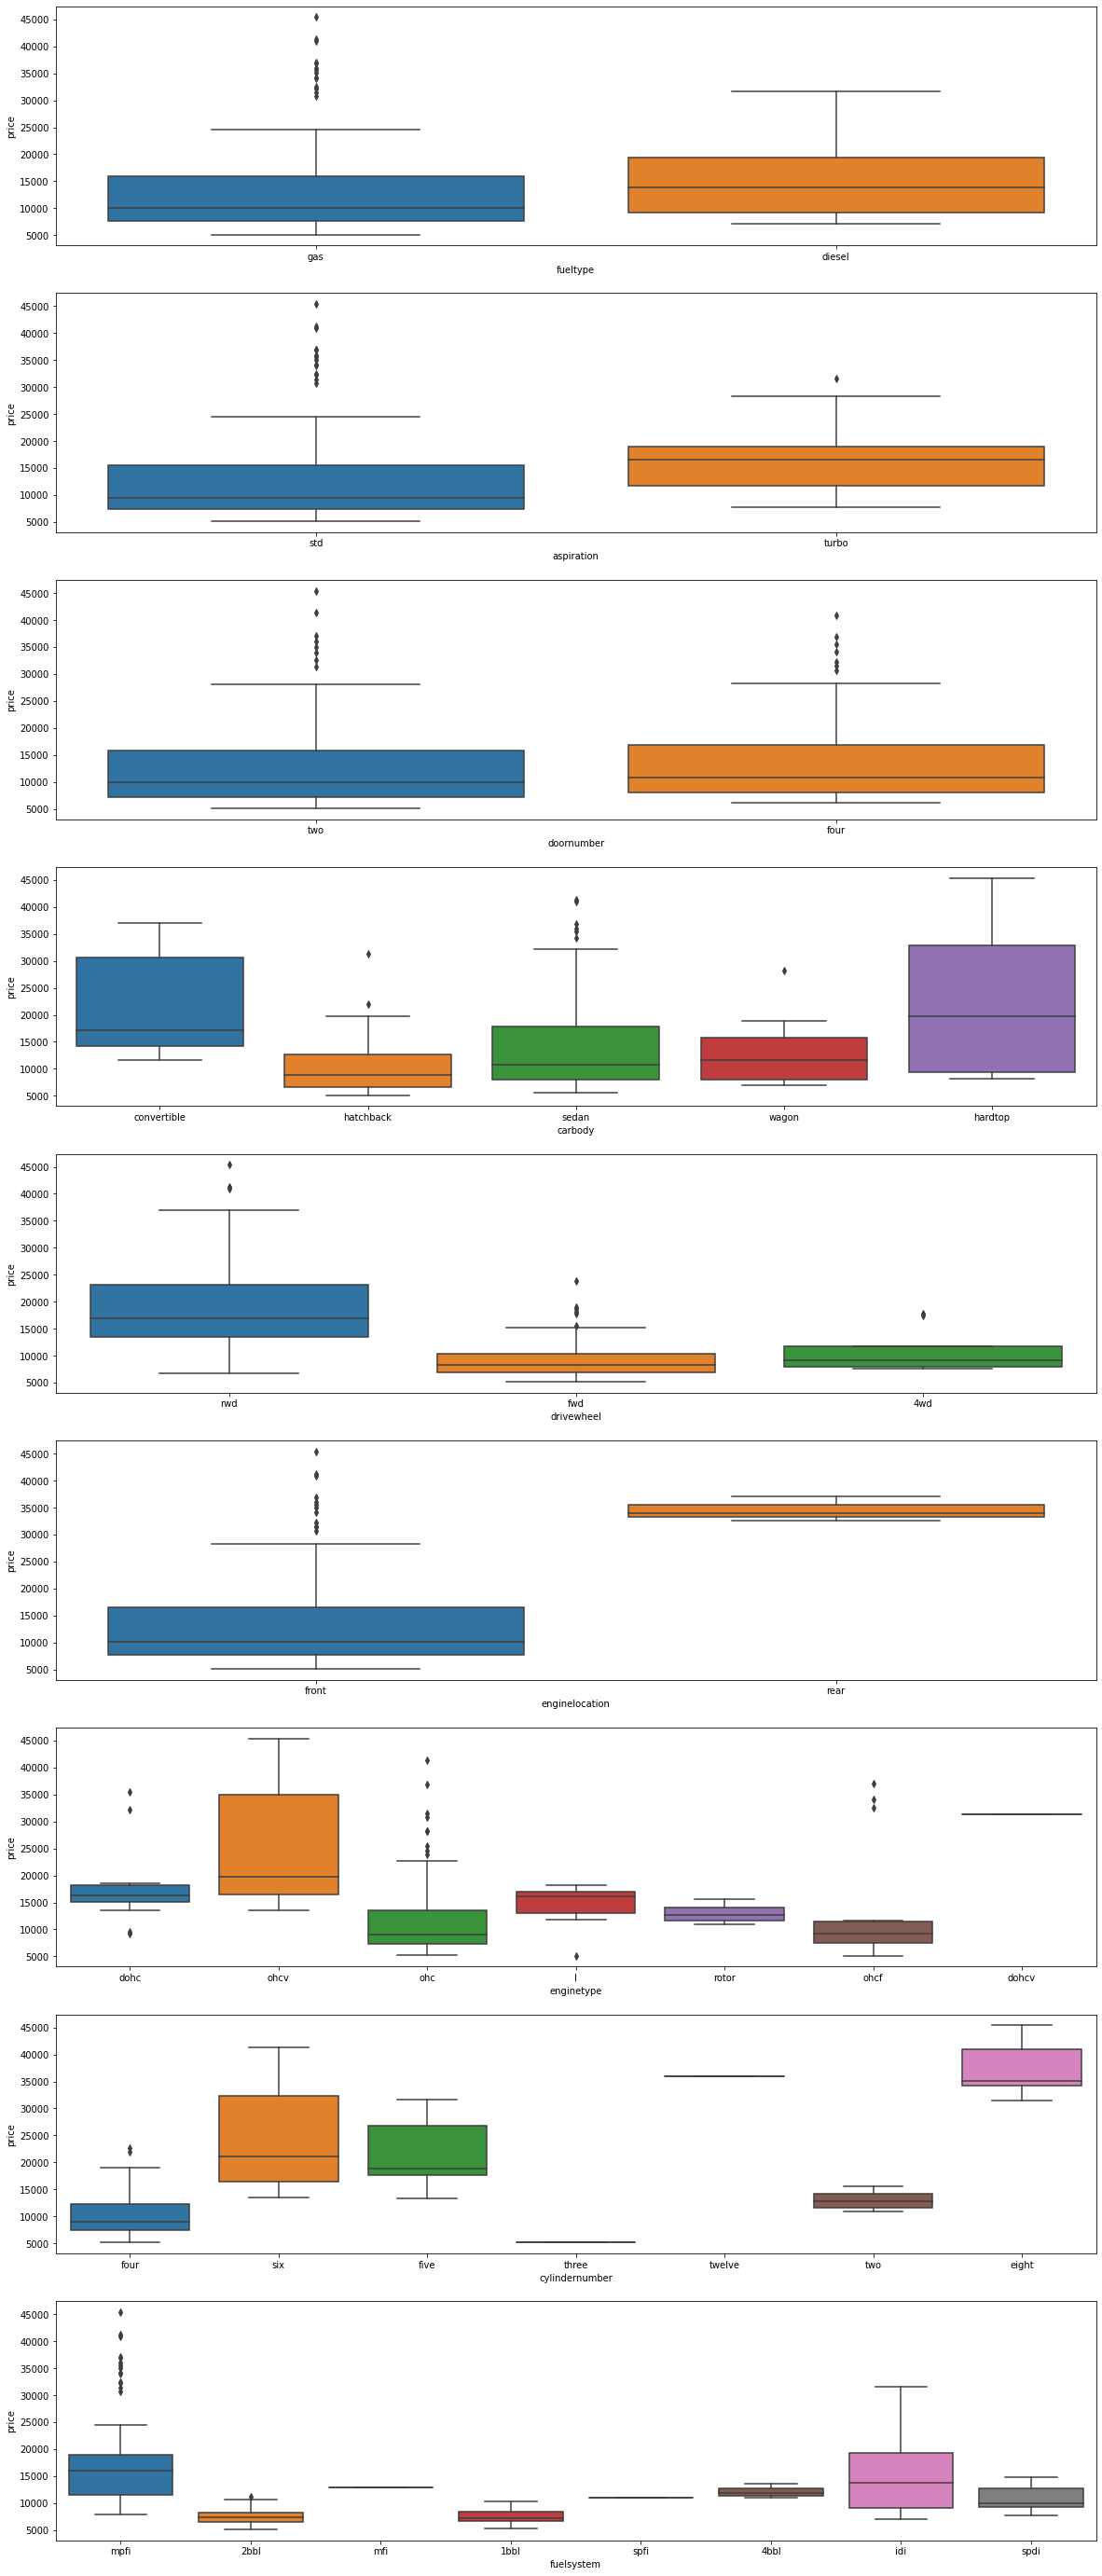

In [18]:
# Anyway, lets find out the effect of each variables w.r.t price
fig, axes = plt.subplots(9,1,figsize=(20,50))
#sns.boxplot(y="price",x="enginetype",data=df_cars,ax=axes[0])
for i,j in enumerate(cat_vars):
    sns.boxplot(y="price",x=j,data=df_cars,ax=axes[i])

- Observation:
- - Fueltype - Generally diesel cars are slightly costlier than petrol ones. However, there are few petrol cars that are having very high prices
- - Aspiration - Turbo cars are costlier than std cars
- - Doornumber - Two doors and four door cars are available almost at similar level/
- - Carbody - Wagon/ hatchback type cars have lower price compared to other three
- - Drivewheel - Rear wheel drive cars are costlier
- - Engineloation - Rear engine cars cost significantly higher than front wheel/allwheel drives
- - EngineType - ohcv is having highest price in general
- - Cylindernumber -As the number of cylinders increase cost also increases. 8 cylinder cars are costlier than four/five/two cylinder cars
- - Fuelsystem - there is not much variance of the price explained by this variable. Average prices are almost the same; 1bbl, 2bbl systems are relatively cheaper

##### Numerical variables

In [19]:
numvars= ["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]
cars_num = df_cars[numvars]
cars_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 7200x7200 with 0 Axes>

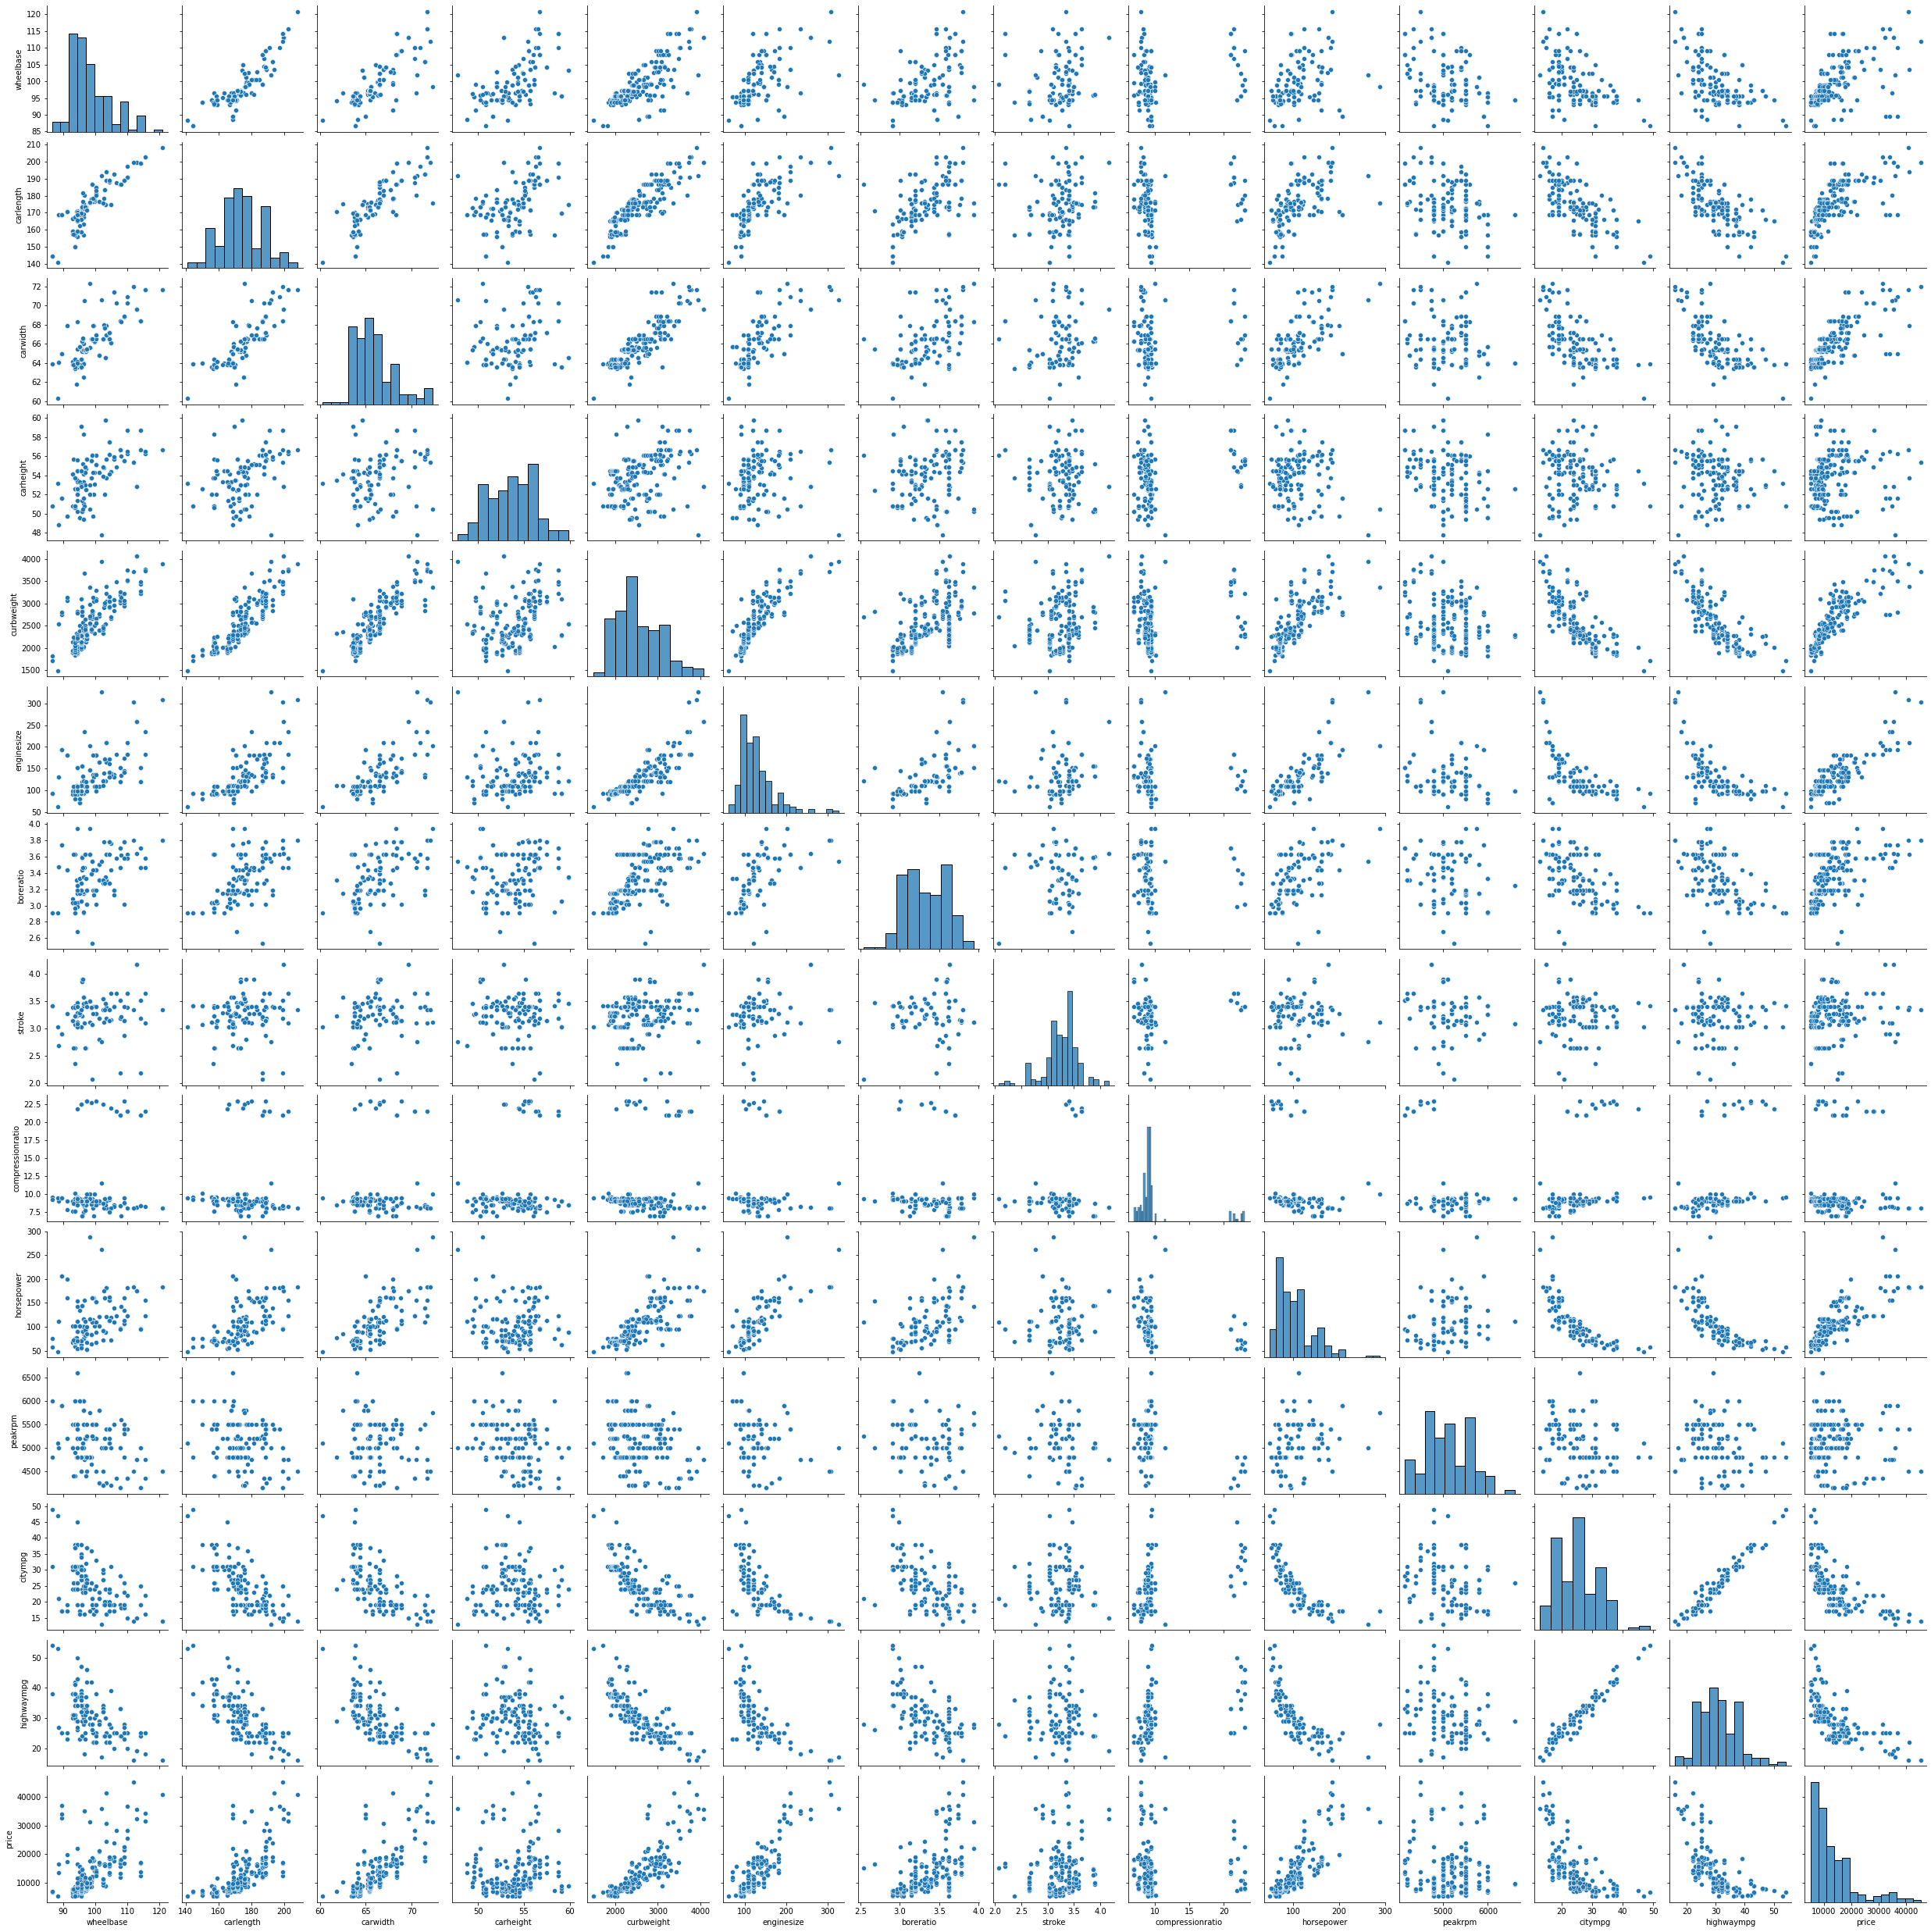

In [20]:
# Lets plot all into a pair plot 
plt.figure(figsize=(100,100))
sns.pairplot(cars_num)
plt.show()

- Thank you for having patience, many variables look to be almost linear
- But looking at the relationship with the price, except for the boreratio, stroke, peak rpm and compression ratio, other variables have more or less having a kind of linear relationship

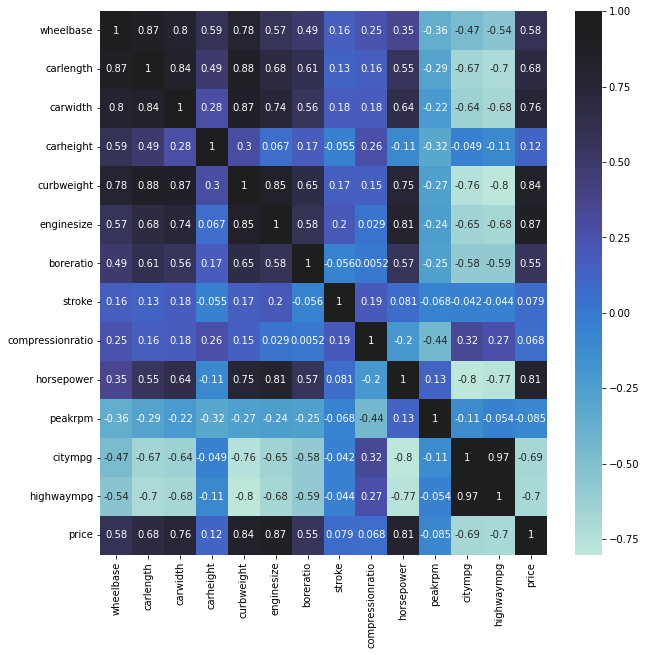

In [21]:
# lets check the heatmap for correlations between variables
plt.figure(figsize=(10,10))
sns.heatmap(cars_num.corr(),annot=True,center=1)
plt.show()

1. Wheelbase is highly correlated to car length - which is obvious right? - but wheelbase also  58% and carlength 68% related to price
2. Also carwidth is highly correlated to carlength - it is also 76% correlated to price - cant afford to eliminate anyone
3. Curbweight is again highly correlated to car width and carlength - also 85% correlated to enginesize
4. Enginesize is 81% correlated to horsepower - ofcourse bigger the engine more horsepower
5. Citympg and  highwaympg are almost synonymous

In [22]:
# Let us form a variable carlength * carwidth * carheight to keep both the information
df_cars["car_size"] = df_cars["carlength"] * df_cars["carwidth"] * df_cars["carheight"]
df_cars = df_cars.drop(["carlength","carwidth","carheight"],axis=1)
df_cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,car_size
car_ID,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,528019.904
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,528019.904
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,587592.640
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,634816.956
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,636734.832


In [23]:
# Next using enginesize and horsepower to create new variable 
df_cars["carpower"] =df_cars["enginesize"] * df_cars["horsepower"]
df_cars = df_cars.drop(["enginesize","horsepower"],axis=1)
df_cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg,highwaympg,price,car_company,car_size,carpower
car_ID,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,mpfi,3.47,2.68,9.0,5000,21,27,13495.0,alfa-romero,528019.904,14430
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,mpfi,3.47,2.68,9.0,5000,21,27,16500.0,alfa-romero,528019.904,14430
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,six,mpfi,2.68,3.47,9.0,5000,19,26,16500.0,alfa-romero,587592.640,23408
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,2337,ohc,four,mpfi,3.19,3.40,10.0,5500,24,30,13950.0,audi,634816.956,11118
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,2824,ohc,five,mpfi,3.19,3.40,8.0,5500,18,22,17450.0,audi,636734.832,15640


In [24]:
# Creating new variable avgmpg using citympg and highwaympg
df_cars["avgmpg"] = (df_cars["citympg"]+df_cars["highwaympg"])/2
df_cars = df_cars.drop(["citympg","highwaympg"],axis=1)
df_cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,price,car_company,car_size,carpower,avgmpg
car_ID,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,mpfi,3.47,2.68,9.0,5000,13495.0,alfa-romero,528019.904,14430,24.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,mpfi,3.47,2.68,9.0,5000,16500.0,alfa-romero,528019.904,14430,24.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,six,mpfi,2.68,3.47,9.0,5000,16500.0,alfa-romero,587592.640,23408,22.5
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,2337,ohc,four,mpfi,3.19,3.40,10.0,5500,13950.0,audi,634816.956,11118,27.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,2824,ohc,five,mpfi,3.19,3.40,8.0,5500,17450.0,audi,636734.832,15640,20.0


In [25]:
# Checking information of the final dataset
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    object 
 11  cylindernumber    205 non-null    object 
 12  fuelsystem        205 non-null    object 
 13  boreratio         205 non-null    float64
 14  stroke            205 non-null    float64
 15  compressionratio  205 non-null    float64
 16  peakrpm           205 non-null    int64  
 1

In [26]:
# We have already constructed car_company hence dropping carName
df_cars = df_cars.drop("CarName",axis=1)
df_cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,price,car_company,car_size,carpower,avgmpg
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,mpfi,3.47,2.68,9.0,5000,13495.0,alfa-romero,528019.904,14430,24.0
2,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,mpfi,3.47,2.68,9.0,5000,16500.0,alfa-romero,528019.904,14430,24.0
3,1,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,six,mpfi,2.68,3.47,9.0,5000,16500.0,alfa-romero,587592.640,23408,22.5
4,2,gas,std,four,sedan,fwd,front,99.8,2337,ohc,four,mpfi,3.19,3.40,10.0,5500,13950.0,audi,634816.956,11118,27.0
5,2,gas,std,four,sedan,4wd,front,99.4,2824,ohc,five,mpfi,3.19,3.40,8.0,5500,17450.0,audi,636734.832,15640,20.0


In [27]:
# Separating categorical and Numerical variables
cat_vars=["symboling","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem","car_company"]
num_vars = ["wheelbase","car_size","curbweight","carpower","boreratio","stroke","compressionratio","peakrpm","avgmpg","price"]
df_cars_cat = df_cars[cat_vars]
df_cars_num = df_cars[num_vars]


In [28]:
# Creating dummy variables for categorical variables
df_cars_cat_dummies = pd.get_dummies(df_cars_cat,drop_first=False)
df_cars_cat_dummies.head()

,symboling,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_alfa-romero,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df_cars_cat_dummies.sum()

symboling                  171
fueltype_diesel             20
fueltype_gas               185
aspiration_std             168
aspiration_turbo            37
doornumber_four            115
doornumber_two              90
carbody_convertible          6
carbody_hardtop              8
carbody_hatchback           70
carbody_sedan               96
carbody_wagon               25
drivewheel_4wd               9
drivewheel_fwd             120
drivewheel_rwd              76
enginelocation_front       202
enginelocation_rear          3
enginetype_dohc             12
enginetype_dohcv             1
enginetype_l                12
enginetype_ohc             148
enginetype_ohcf             15
enginetype_ohcv             13
enginetype_rotor             4
cylindernumber_eight         5
cylindernumber_five         11
cylindernumber_four        159
cylindernumber_six          24
cylindernumber_three         1
cylindernumber_twelve        1
cylindernumber_two           4
fuelsystem_1bbl             11
fuelsyst

In [30]:
# We will drop the variables which are having lesser observations in each categories
drop_vars = ["fueltype_diesel","aspiration_turbo","carbody_convertible","carbody_wagon","drivewheel_4wd","enginelocation_rear","enginetype_dohcv","cylindernumber_twelve","fuelsystem_mfi","car_company_mercury"]
df_cars_cat_dummies = df_cars_cat_dummies.drop(drop_vars,axis=1)
df_cars_cat_dummies.head()

,symboling,fueltype_gas,aspiration_std,doornumber_four,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_alfa-romero,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


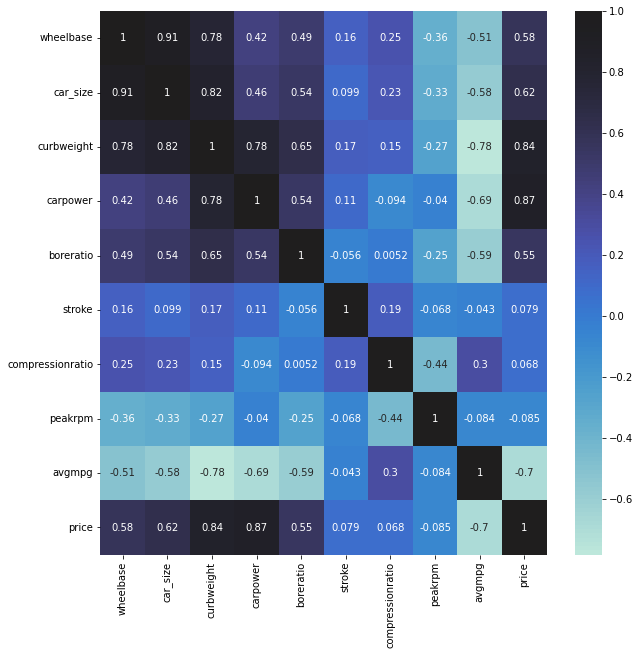

In [31]:
# Lets check Numerical variables again for multi-collinearity
plt.figure(figsize=(10,10))
sns.heatmap(df_cars_num.corr(),annot=True,center=1)
plt.show()

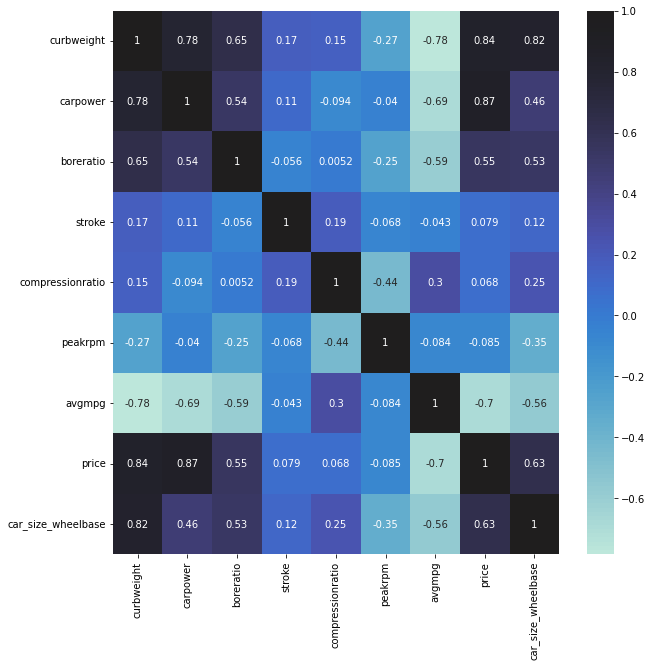

In [32]:
# Lets not drop wheelbase or car_size - create new variable car_size_base
df_cars_num["car_size_wheelbase"] = df_cars_num["car_size"] * df_cars_num["wheelbase"]
df_cars_num = df_cars_num.drop(["car_size","wheelbase"],axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(df_cars_num.corr(),annot=True, center=1)
plt.show()


- Still we have curbweight that is 82% correlated to car_size_wheelbase
- But both variables seem to be pretty much important
- We will create separate training models treating each variables separately


In [33]:
# Lets concat two dataframes with categorical and numerical variables into a single dataframe
df_cars_merged = pd.concat([df_cars_cat_dummies,df_cars_num],axis=1)
df_cars_merged.head()

,symboling,fueltype_gas,aspiration_std,doornumber_four,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_alfa-romero,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo,curbweight,carpower,boreratio,stroke,compressionratio,peakrpm,avgmpg,price,car_size_wheelbase
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2548,14430,3.47,2.68,9.0,5000,24.0,13495.0,4.678256e+07
2,3,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2548,14430,3.47,2.68,9.0,5000,24.0,16500.0,4.678256e+07
3,1,1,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2823,23408,2.68,3.47,9.0,5000,22.5,16500.0,5.552750e+07
4,2,1,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2337,11118,3.19,3.40,10.0,5500,27.0,13950.0,6.335473e+07
5,2,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2824,15640,3.19,3.40,8.0,5500,20.0,17450.0,6.329144e+07


#### Data Normalization as variables are at different scales

In [34]:
# scaling needed for numerical variables including symboling
num_vars=['car_size_wheelbase',
 'curbweight',
 'carpower',
 'boreratio',
 'stroke',
 'compressionratio',
 'peakrpm',
 'avgmpg',
 'price',
 'symboling']

In [35]:
from sklearn.preprocessing import MinMaxScaler
mscale = MinMaxScaler()

In [36]:
df_cars_merged[num_vars] = mscale.fit_transform(df_cars_merged[num_vars])
df_cars_merged.head()

,symboling,fueltype_gas,aspiration_std,doornumber_four,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_alfa-romero,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo,curbweight,carpower,boreratio,stroke,compressionratio,peakrpm,avgmpg,price,car_size_wheelbase
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.411171,0.139445,0.664286,0.290476,0.1250,0.346939,0.246575,0.207959,0.108705
2,1.0,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.411171,0.139445,0.664286,0.290476,0.1250,0.346939,0.246575,0.282558,0.108705
3,0.6,1,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.517843,0.248291,0.100000,0.666667,0.1250,0.346939,0.205479,0.282558,0.249144
4,0.8,1,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.329325,0.099292,0.464286,0.633333,0.1875,0.551020,0.328767,0.219254,0.374845
5,0.8,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.518231,0.154115,0.464286,0.633333,0.0625,0.551020,0.136986,0.306142,0.373828


In [37]:
# Splitting train and test data
from sklearn.model_selection import train_test_split

In [38]:
df_train,df_test = train_test_split(df_cars_merged, random_state=100, train_size=0.7)
print(df_train.shape,df_test.shape)

(143, 60) (62, 60)


# First Model

In [39]:
#pip install statsmodels

In [40]:
import statsmodels.api as stat
import statsmodels as sm

In [41]:
# Lets build first model including all variables 
y_train = df_train.pop("price")
X_train = df_train

In [42]:
X_train_sm = stat.add_constant(X_train)
ols1 = stat.OLS(y_train,X_train_sm)
linear_model1 = ols1.fit()

In [43]:
linear_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     46.50
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           1.32e-47
Time:                        13:51:16   Log-Likelihood:                 268.05
No. Observations:                 143   AIC:                            -432.1
Df Residuals:                      91   BIC:                            -278.0
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.3547      0.143     -2.478      0.015      -0.639      -0.070
symboling                   0.0245      0.037      0.665      0.508      -0.049       0.098
fueltype_gas               -0.1616      0.066     -2.442      0.017      -0.293      -0.030
aspiration_std             -0.0325      0.024     -1.370      0.174      -0.080       0.015
doornumber_four            -0.1743      0.073     -2.404      0.018      -0.318      -0.030
doornumber_two             -0.1803      0.071     -2.525      0.013      -0.322      -0.038
carbody_hardtop             0.0018      0.040      0.044      0.965      -0.078       0.082
carbody_hatchback          -0.0015      0.019     -0.080      0.936      -0.039       0.036
carbody_sedan               0.0056      0.015      0.372      0.711      -0.024       0.036
drivewheel_fwd              0.0134      0.025      0.542      0.589      -0.036       0.063
drivewheel_rwd              0.0142      0.033      0.428      0.669      -0.052       0.080
enginelocation_front       -0.3320      0.077     -4.322      0.000      -0.485      -0.179
enginetype_dohc             0.3974      0.117      3.394      0.001       0.165       0.630
enginetype_l                0.4984      0.139      3.591      0.001       0.223       0.774
enginetype_ohc              0.4716      0.122      3.852      0.000       0.228       0.715
enginetype_ohcf             0.1812      0.064      2.824      0.006       0.054       0.309
enginetype_ohcv             0.3660      0.115      3.180      0.002       0.137       0.595
enginetype_rotor            0.5968      0.158      3.778      0.000       0.283       0.911
cylindernumber_eight        0.7114      0.204      3.490      0.001       0.307       1.116
cylindernumber_five         0.5772      0.245      2.360      0.020       0.091       1.063
cylindernumber_four         0.6065      0.250      2.424      0.017       0.110       1.103
cylindernumber_six          0.5662      0.205      2.757      0.007       0.158       0.974
cylindernumber_three        0.6297      0.190      3.316      0.001       0.253       1.007
cylindernumber_two          0.5968      0.158      3.778      0.000       0.283       0.911
fuelsystem_1bbl            -0.0359      0.047     -0.757      0.451      -0.130       0.058
fuelsystem_2bbl            -0.0138      0.021     -0.670      0.505      -0.055       0.027
fuelsystem_4bbl            -0.0469      0.048     -0.971      0.334      -0.143       0.049
fuelsystem_idi             -0.1931      0.167     -1.154      0.251      -0.525       0.139
fuelsystem_mpfi            -0.0230      0.023     -0.996      0.322      -0.069       0.023
fuelsystem_spdi            -0.0419      0.035     -1.201      0.233      -0.111       0.027
fuelsystem_spfi          4.008e-15    1.3e-15  

- so many variables are having high p-values and highly unstable
- Let us try Recursive feature elimination methods and find out what this process suggests

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
rfe_lm = LinearRegression()

In [46]:
rfe_lm.fit(X_train,y_train)
rfe = RFE(rfe_lm,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [47]:
list(zip(X_train.columns,rfe.ranking_,rfe.support_))

[('symboling', 33, False),
 ('fueltype_gas', 42, False),
 ('aspiration_std', 16, False),
 ('doornumber_four', 40, False),
 ('doornumber_two', 34, False),
 ('carbody_hardtop', 43, False),
 ('carbody_hatchback', 45, False),
 ('carbody_sedan', 37, False),
 ('drivewheel_fwd', 31, False),
 ('drivewheel_rwd', 30, False),
 ('enginelocation_front', 1, True),
 ('enginetype_dohc', 1, True),
 ('enginetype_l', 1, True),
 ('enginetype_ohc', 1, True),
 ('enginetype_ohcf', 1, True),
 ('enginetype_ohcv', 1, True),
 ('enginetype_rotor', 1, True),
 ('cylindernumber_eight', 1, True),
 ('cylindernumber_five', 1, True),
 ('cylindernumber_four', 1, True),
 ('cylindernumber_six', 1, True),
 ('cylindernumber_three', 1, True),
 ('cylindernumber_two', 1, True),
 ('fuelsystem_1bbl', 39, False),
 ('fuelsystem_2bbl', 22, False),
 ('fuelsystem_4bbl', 36, False),
 ('fuelsystem_idi', 41, False),
 ('fuelsystem_mpfi', 23, False),
 ('fuelsystem_spdi', 38, False),
 ('fuelsystem_spfi', 44, False),
 ('car_company_alfa-rome

In [48]:
# Let us select top 15 features suggested by RFE
list(X_train.columns[rfe.support_])

['enginelocation_front',
 'enginetype_dohc',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_eight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_three',
 'cylindernumber_two',
 'carpower',
 'car_size_wheelbase']

In [49]:
# Lets train a model with these 15 features
X_train_new = X_train[list(X_train.columns[rfe.support_])]

In [50]:
X_train_new_sm = stat.add_constant(X_train_new)
lr_model_new = stat.OLS(y_train,X_train_new_sm)
lr_model = lr_model_new.fit()

In [51]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     78.51
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           1.02e-55
Time:                        13:51:17   Log-Likelihood:                 193.86
No. Observations:                 143   AIC:                            -357.7
Df Residuals:                     128   BIC:                            -313.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.8077      0.214     -3.781      0.000      -1.230      -0.385
enginelocation_front    -0.1384      0.080     -1.734      0.085      -0.296       0.020
enginetype_dohc          0.4369      0.096      4.564      0.000       0.247       0.626
enginetype_l             0.4882      0.108      4.507      0.000       0.274       0.703
enginetype_ohc           0.5219      0.100      5.244      0.000       0.325       0.719
enginetype_ohcf          0.4954      0.102      4.867      0.000       0.294       0.697
enginetype_ohcv          0.3495      0.089      3.914      0.000       0.173       0.526
enginetype_rotor         0.5057      0.089      5.683      0.000       0.330       0.682
cylindernumber_eight     0.6564      0.109      6.000      0.000       0.440       0.873
cylindernumber_five      0.4314      0.120      3.600      0.000       0.194       0.668
cylindernumber_four      0.3659      0.124      2.958      0.004       0.121       0.611
cylindernumber_six       0.4192      0.107      3.910      0.000       0.207       0.631
cylindernumber_three     0.4588      0.149      3.080      0.003       0.164       0.753
cylindernumber_two       0.5057      0.089      5.683      0.000       0.330       0.682
carpower                 1.2510      0.116     10.810      0.000       1.022       1.480
car_size_wheelbase       0.2693      0.050      5.407      0.000       0.171       0.368
==============================================================================
Omnibus:                       21.437   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.090
Skew:                           0.780   Prob(JB):                     1.08e-07
Kurtosis:                       4.717   Cond. No.                     4.42e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.38e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- This model is little better 
- P-values are also under control
- I am happy with R2 and adjusted R2 , AIC and BIC

In [52]:
# Predicting against the training set
y_train_pred = lr_model.predict(X_train_new_sm)

### Residual Analysis


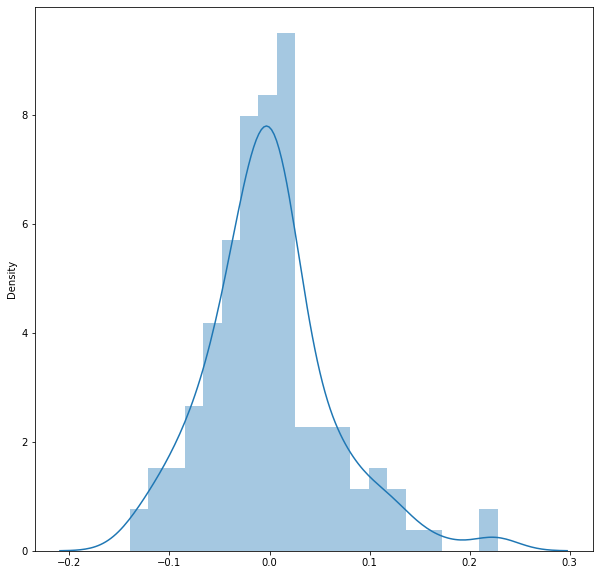

In [53]:
# Distribution of error terms in training set
plt.figure(figsize=(10,10))
sns.distplot((y_train-y_train_pred),bins = 20)
plt.show()

- Error terms are more or less normally distributed wrt 0

# Model Evaluation against test set

In [54]:
y_test = df_test.pop("price")
X_test = df_test[X_train.columns[rfe.support_]]

In [55]:
X_test_sm = stat.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

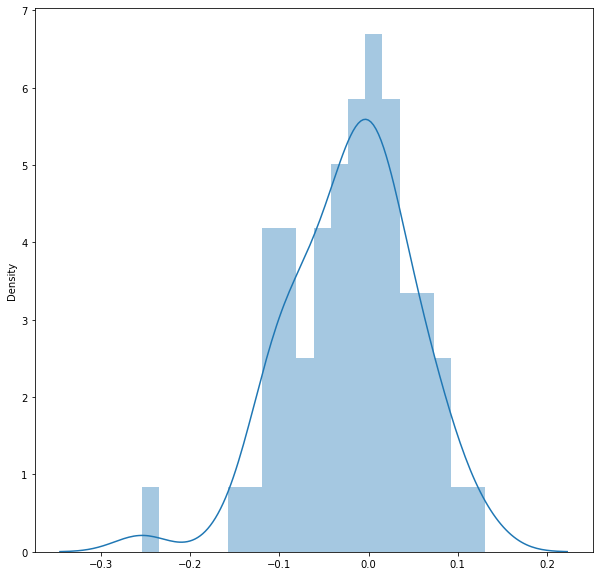

In [56]:
# Distribution of error terms in test set
plt.figure(figsize=(10,10))
sns.distplot((y_test-y_test_pred),bins = 20)
plt.show()

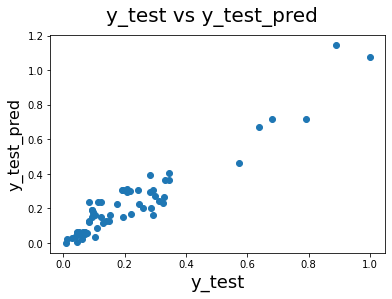

In [57]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                      # y-label
plt.show()

In [58]:
from sklearn.metrics import r2_score

In [59]:
r2_train = r2_score(y_true=y_train,y_pred=y_train_pred)
r2_test = r2_score(y_true=y_test,y_pred=y_test_pred)
print(r2_train,r2_test)


0.8956961305105973 0.88034297057276


- In both cases almost 89% variance in price is explained by the model

- What could be done to get better prediction?
- Possibly, segment-wise regression would be a better choice. 
- DT or SVM to split attributes into multiple segments and then could apply Linear Regression on each segments
- Although, the final model using just Linear Regression is a good one.

In [60]:
# Lets find MAE values for train and test dataset
from sklearn.metrics import mean_squared_error

In [61]:
mae_train = mean_squared_error(y_true=y_train,y_pred=y_train_pred)
mae_test = mean_squared_error(y_true=y_test,y_pred=y_test_pred)
print(mae_train,mae_test)

0.0038904795716717135 0.005164100547786953


- Mean squared error is also very low for the model - next level satisfaction

- But still one thing bothers me is multicollinearity
- Lets check the Vifs

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [63]:
X_train_new_sm.shape[1]

16

In [64]:
vif = [variance_inflation_factor(X_train_new_sm.values,i) for i in range(X_train_new_sm.shape[1])]
df_vif = pd.DataFrame(vif,index=X_train_new_sm.columns)
df_vif

,0
const,1501.013653
enginelocation_front,1.455880
enginetype_dohc,19.605018
enginetype_l,22.768468
enginetype_ohc,70.283299
enginetype_ohcf,26.202243
enginetype_ohcv,15.469192
enginetype_rotor,inf
cylindernumber_eight,8.088615
cylindernumber_five,27.852105


- Terrible, I will remove enginetype_rotor, cylindernumber_two,cylindernumber_six and enginetype_ohc as a first attempt


In [65]:
X_train_new = X_train_new_sm.drop(["enginetype_rotor","cylindernumber_six","cylindernumber_two","enginetype_ohc"],axis=1)
vif = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
df_vif = pd.DataFrame(vif,index=X_train_new.columns)
df_vif

,0
const,185.034533
enginelocation_front,1.273822
enginetype_dohc,1.318306
enginetype_l,1.771132
enginetype_ohcf,1.130152
enginetype_ohcv,1.803433
cylindernumber_eight,1.270667
cylindernumber_five,1.720081
cylindernumber_four,3.011910
cylindernumber_three,1.493924


In [66]:
# Lets build a model and evaluate them
mod = stat.OLS(y_train,X_train_new)
lr_model = mod.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     77.56
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           7.87e-52
Time:                        13:51:19   Log-Likelihood:                 176.42
No. Observations:                 143   AIC:                            -328.8
Df Residuals:                     131   BIC:                            -293.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3326      0.084      3.972      0.000       0.167       0.498
enginelocation_front    -0.2796      0.083     -3.354      0.001      -0.445      -0.115
enginetype_dohc         -0.0359      0.028     -1.296      0.197      -0.091       0.019
enginetype_l            -0.0536      0.034     -1.590      0.114      -0.120       0.013
enginetype_ohcf         -0.0271      0.024     -1.149      0.252      -0.074       0.020
enginetype_ohcv         -0.1116      0.034     -3.279      0.001      -0.179      -0.044
cylindernumber_eight     0.1426      0.048      2.944      0.004       0.047       0.238
cylindernumber_five     -0.0190      0.033     -0.572      0.569      -0.085       0.047
cylindernumber_four     -0.1040      0.024     -4.265      0.000      -0.152      -0.056
cylindernumber_three     0.0015      0.090      0.016      0.987      -0.177       0.180
carpower                 0.7679      0.075     10.175      0.000       0.619       0.917
car_size_wheelbase       0.3823      0.049      7.766      0.000       0.285       0.480
==============================================================================
Omnibus:                       34.283   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.241
Skew:                           0.913   Prob(JB):                     3.43e-21
Kurtosis:                       6.533   Cond. No.                         32.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Now p-values are dangerous

In [67]:
X_train_new = X_train_new.drop(["enginetype_ohcf","cylindernumber_three","enginetype_dohc","cylindernumber_five"],axis=1)
mod = stat.OLS(y_train,X_train_new)
lr_model = mod.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     122.5
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           2.83e-55
Time:                        13:51:19   Log-Likelihood:                 174.85
No. Observations:                 143   AIC:                            -333.7
Df Residuals:                     135   BIC:                            -310.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3154      0.079      3.987      0.000       0.159       0.472
enginelocation_front    -0.2700      0.078     -3.456      0.001      -0.424      -0.115
enginetype_l            -0.0455      0.029     -1.593      0.113      -0.102       0.011
enginetype_ohcv         -0.0958      0.031     -3.076      0.003      -0.157      -0.034
cylindernumber_eight     0.1524      0.048      3.203      0.002       0.058       0.247
cylindernumber_four     -0.0980      0.019     -5.130      0.000      -0.136      -0.060
carpower                 0.7480      0.070     10.689      0.000       0.610       0.886
car_size_wheelbase       0.3766      0.043      8.747      0.000       0.291       0.462
==============================================================================
Omnibus:                       34.406   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.863
Skew:                           0.864   Prob(JB):                     3.78e-24
Kurtosis:                       6.888   Cond. No.                         30.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Finally removing enginetype_l
X_train_new = X_train_new.drop("enginetype_l",axis=1)
mod = stat.OLS(y_train,X_train_new)
lr_model = mod.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     140.8
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           7.96e-56
Time:                        14:14:22   Log-Likelihood:                 173.52
No. Observations:                 143   AIC:                            -333.0
Df Residuals:                     136   BIC:                            -312.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3145      0.080      3.954      0.000       0.157       0.472
enginelocation_front    -0.2593      0.078     -3.313      0.001      -0.414      -0.105
enginetype_ohcv         -0.0976      0.031     -3.120      0.002      -0.160      -0.036
cylindernumber_eight     0.1539      0.048      3.216      0.002       0.059       0.249
cylindernumber_four     -0.1031      0.019     -5.445      0.000      -0.141      -0.066
carpower                 0.7620      0.070     10.915      0.000       0.624       0.900
car_size_wheelbase       0.3451      0.038      8.972      0.000       0.269       0.421
==============================================================================
Omnibus:                       33.661   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.588
Skew:                           0.846   Prob(JB):                     1.95e-23
Kurtosis:                       6.833   Cond. No.                         30.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- This looks good - Testing these models are needed

In [71]:
y_train_pred = lr_model.predict(X_train_new)
y_test_pred =  lr_model.predict(X_test_sm[X_train_new.columns])

In [72]:
# R2 score
r2_train = r2_score(y_true=y_train,y_pred=y_train_pred)
r2_test = r2_score(y_true=y_test,y_pred=y_test_pred)
print(r2_train,r2_test)

0.861374002893483 0.9203429079921441


- THis is my Final Model for this session